In [1]:
%matplotlib inline

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from random import randint

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


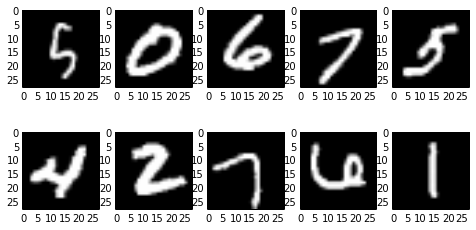

In [2]:
import pylab as pylab
pylab.rcParams['figure.figsize'] = (8.0, 4.0)

f, axes = plt.subplots(2, 5)

for i in range(10):
    axes.ravel()[i].imshow(mnist.train.images[randint(0,1000)].reshape((28,28)), cmap="gray")

In [3]:
def weight_variable(shape):
  initial = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(initial)

def bias_variable(shape):
  initial = tf.constant(0.1, shape=shape)
  return tf.Variable(initial)

def conv2d(x, W):
  return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
  return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')

In [8]:
x = tf.placeholder(tf.float32,[None, 784])
y_ = tf.placeholder(tf.float32, [None, 10])

x_image = tf.reshape(x, [-1,28,28,1])

W_conv1 = weight_variable([5, 5, 1, 20])
b_conv1 = bias_variable([20])

W_conv2 = weight_variable([5, 5, 20, 30])
b_conv2 = bias_variable([30])

W_fc1 = weight_variable([7 * 7 * 30, 1024])
b_fc1 = bias_variable([1024])


h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)
h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)


h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*30])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)


keep_prob = tf.placeholder("float")
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])

y_conv=tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)


testPerformance = []
trainPerformance = []

sess = tf.InteractiveSession()
cross_entropy = -tf.reduce_sum(y_*tf.log(y_conv))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
sess.run(tf.initialize_all_variables())
for i in range(1500):
    batch = mnist.train.next_batch(100)
    
    if i%50 == 0:
        testPerformance.append(1 - accuracy.eval(feed_dict={
            x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))
        trainPerformance.append(1 - accuracy.eval(feed_dict={
                x:batch[0], y_: batch[1], keep_prob: 1.0}))
        print "step %d, training accuracy %g"%(i, trainPerformance[-1])
    train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})



Exception AssertionError: AssertionError() in <bound method InteractiveSession.__del__ of <tensorflow.python.client.session.InteractiveSession object at 0x7f551398dc90>> ignored


step 0, training accuracy 0.92
step 50, training accuracy 0.3
step 100, training accuracy 0.19
step 150, training accuracy 0.13
step 200, training accuracy 0.06
step 250, training accuracy 0.03
step 300, training accuracy 0.03
step 350, training accuracy 0.08
step 400, training accuracy 0.06
step 450, training accuracy 0.08
step 500, training accuracy 0.07
step 550, training accuracy 0.06
step 600, training accuracy 0.04
step 650, training accuracy 0.06
step 700, training accuracy 0.03
step 750, training accuracy 0.02
step 800, training accuracy 0.04
step 850, training accuracy 0.03
step 900, training accuracy 0.04
step 950, training accuracy 0.02
step 1000, training accuracy 0.03
step 1050, training accuracy 0.04
step 1100, training accuracy 0.02
step 1150, training accuracy 0.04
step 1200, training accuracy 0.00999999
step 1250, training accuracy 0.02
step 1300, training accuracy 0.00999999
step 1350, training accuracy 0.03
step 1400, training accuracy 0.03
step 1450, training accura

In [9]:
print "Test accuracy %g"%accuracy.eval(feed_dict={
    x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0})

Test accuracy 0.9772


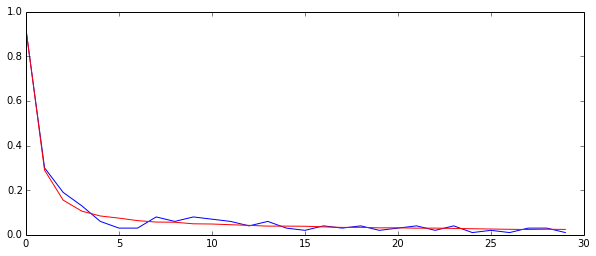

In [10]:
plt.plot(trainPerformance, "b")
plt.plot(np.asarray(testPerformance), "r")
plt.show()

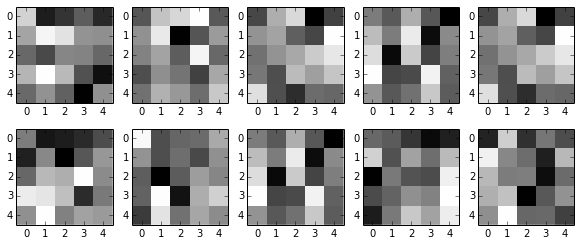

In [11]:
import pylab as pylab
pylab.rcParams['figure.figsize'] = (10.0, 4.0)

fW = sess.run(W_conv1)

f, axes = plt.subplots(2, 5)

for i in range(10):
    axes.ravel()[i].imshow(np.asarray(fW[:,:,:,randint(0,19)]).reshape((5,5)),cmap="gray" ,interpolation="none")

In [12]:
print fW.shape

(5, 5, 1, 20)


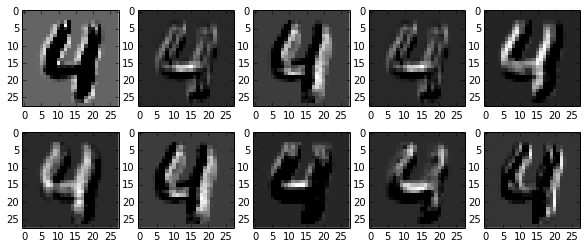

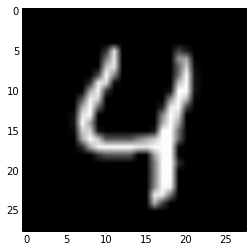

In [16]:
conv1 = sess.run(h_conv1, feed_dict={x: mnist.test.images[4:], y_: mnist.test.labels})[0,:,:,:]

f, axes = plt.subplots(2, 5)

for i in range(10):
    axes.ravel()[i].imshow(np.asarray(conv1[:,:,randint(0,19)]).reshape((28,28)), cmap="gray",interpolation="none")

plt.show()
plt.imshow(mnist.test.images[4].reshape(28,28), cmap="gray")
    